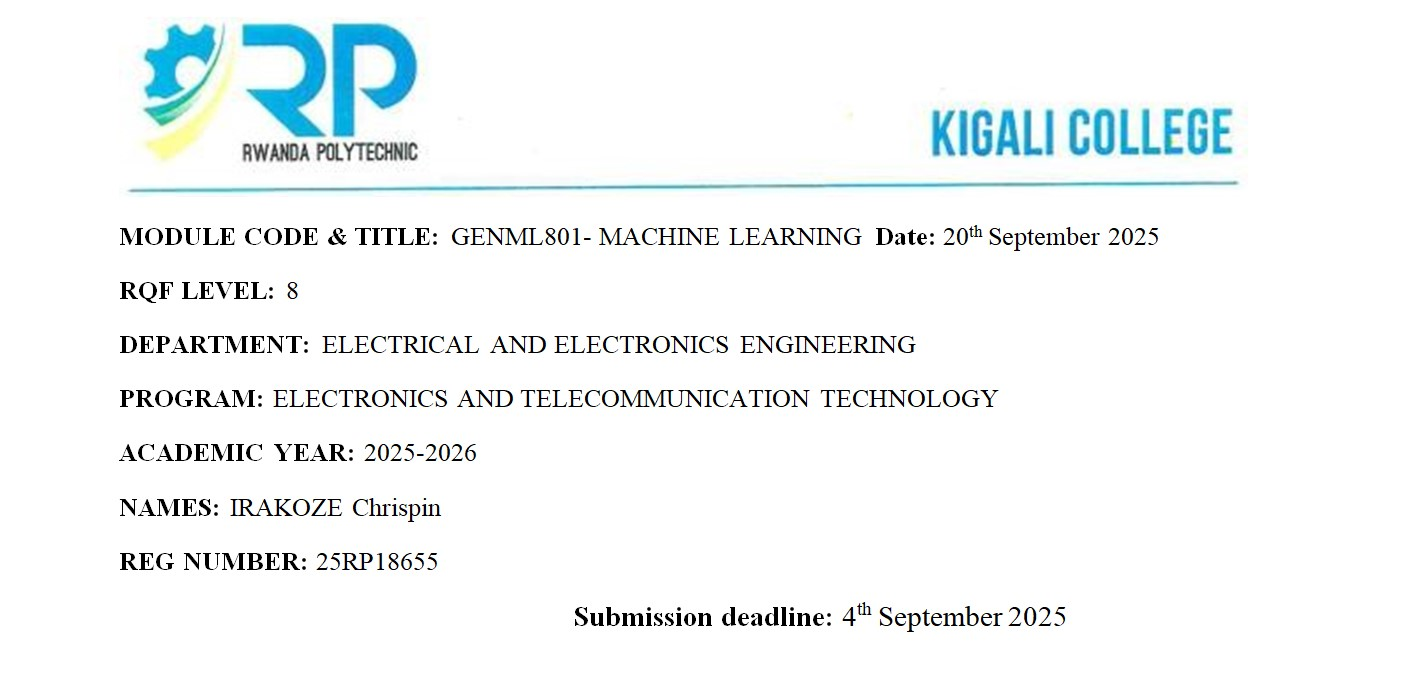

#### Machine learning assignment

##### TASKS: 1.	Define a Problem Statement

.Clearly state the problem you want to solve with the dataset.

.Explain why this problem is important and how solving it can provide insights.


##### Problem Statement:
Mobile money services are widely used in financial transactions, but they are increasingly targeted by fraudsters. Fraudulent activities not only cause financial losses but also undermine trust in digital financial systems. The challenge is to build a system that can detect fraudulent transactions in real-time to minimize risks.

##### Importance: 
By solving this problem, we help financial institutions and mobile operators protect customers, reduce fraud-related losses, and strengthen financial inclusion. This also ensures trust in mobile payment platforms, especially in developing regions where they are a lifeline for daily transactions.

##### 2. Choose a Dataset 

In [ ]:
# 2. Choose a Dataset
# Fraud Prediction in Mobile Money Transactions using Machine Learning

import pandas as pd

# Load dataset
file_path = "paysim dataset.csv"
data = pd.read_csv(file_path)

# Preview dataset
print("Dataset Preview:")
print(data.head())

# Dataset info
print("\nDataset Information:")
print(data.info())

# Shape of dataset
print("\nDataset Shape:", data.shape)

# Missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Features
print("\nDataset Features (Columns):")
print(data.columns.tolist())

# Target distribution
print("\nTarget Variable (isFraud) Distribution:")
print(data['isFraud'].value_counts(normalize=True))
# Take 100k random samples for easier processing
sample_data = data.sample(100000, random_state=42)
print("Sample Shape:", sample_data.shape)




##### 3.	Apply Exploratory Data Analysis (EDA)/

•	Identify the types of EDA you are applying (univariate, bivariate, multivariate).

•	Perform data visualization and chart selection (histograms, scatter plots, box plots, bar charts, etc.).

•	Apply correlation matrix and pair plots to analyze relationships.

•	Explore missing values, outliers, and data anomalies.


In [ ]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
file_path = "paysim dataset.csv"
data = pd.read_csv(file_path)

print("=== EXPLORATORY DATA ANALYSIS (EDA) ===")
print(f"Dataset Shape: {data.shape}")

##### 3.1 Check for Missing Values and Data Types

In [ ]:
# Check for missing values
print("\n=== MISSING VALUES ANALYSIS ===")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])

# Data types information
print("\n=== DATA TYPES ===")
print(data.dtypes)

##### Why Bivariate Analysis is Best for my Project:
Fraud Detection Focus: You need to understand relationships between features and the target variable (isFraud)

Imbalanced Dataset: With only 0.13% fraud cases, bivariate analysis helps identify what distinguishes fraud from genuine transactions

Actionable Insights: Directly shows which features are most predictive of fraud

Feature Selection: Helps identify which variables to engineer and include in your model

##### 3.2 Perform data visualization and chart selection (histograms, scatter plots, box plots, bar charts, etc.).

In [ ]:
# 1.1 Histograms for Numerical Feature Distributions
print("\n📊 1. HISTOGRAMS - Numerical Feature Distributions")

plt.figure(figsize=(20, 15))

# Select key numerical features for fraud analysis
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    
    # Plot genuine vs fraud distributions
    genuine_data = data[data['isFraud'] == 0][feature]
    fraud_data = data[data['isFraud'] == 1][feature]
    
    # Use log scale for better visualization of skewed data
    plt.hist(np.log1p(genuine_data.sample(10000)), bins=50, alpha=0.7, 
             label='Genuine', color='green', density=True)
    plt.hist(np.log1p(fraud_data), bins=50, alpha=0.7, 
             label='Fraud', color='red', density=True)
    
    plt.title(f'Distribution: {feature}\n(Log Scale)', fontweight='bold')
    plt.xlabel(f'log({feature} + 1)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 1.2 Box Plots for Outlier Detection
print("\n📦 2. BOX PLOTS - Outlier Analysis by Fraud Status")

plt.figure(figsize=(18, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    
    # Create box plots for genuine vs fraud
    plot_data = []
    labels = []
    
    for fraud_status in [0, 1]:
        subset = data[data['isFraud'] == fraud_status][feature]
        if len(subset) > 0:
            # Use log scale for better visualization
            plot_data.append(np.log1p(subset))
            labels.append('Genuine' if fraud_status == 0 else 'Fraud')
    
    plt.boxplot(plot_data, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Box Plot: {feature}\n(Log Scale)', fontweight='bold')
    plt.ylabel(f'log({feature} + 1)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 1.3 Bar Charts for Categorical Analysis
print("\n📈 3. BAR CHARTS - Categorical Feature Analysis")

plt.figure(figsize=(20, 12))

# Transaction type analysis
plt.subplot(2, 3, 1)
type_fraud_analysis = data.groupby('type').agg({
    'isFraud': ['count', 'mean']
}).round(4)
type_fraud_analysis.columns = ['total_count', 'fraud_rate']

bars = plt.bar(type_fraud_analysis.index, type_fraud_analysis['fraud_rate'] * 100, 
               color=['red' if rate > 0 else 'skyblue' for rate in type_fraud_analysis['fraud_rate']])
plt.title('Fraud Rate by Transaction Type', fontweight='bold', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)

for bar, rate in zip(bars, type_fraud_analysis['fraud_rate'] * 100):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.3f}%', ha='center', va='bottom', fontweight='bold')

# Transaction count by type
plt.subplot(2, 3, 2)
type_counts = data['type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color='lightgreen', alpha=0.8)
plt.title('Transaction Count by Type', fontweight='bold', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(type_counts.values):
    plt.text(i, count + 10000, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Fraud count by type
plt.subplot(2, 3, 3)
fraud_by_type = data[data['isFraud'] == 1]['type'].value_counts()
plt.bar(fraud_by_type.index, fraud_by_type.values, color='red', alpha=0.8)
plt.title('Fraud Count by Transaction Type', fontweight='bold', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(fraud_by_type.values):
    plt.text(i, count + 2, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 1.4 Scatter Plots for Relationship Analysis
print("\n🔍 4. SCATTER PLOTS - Feature Relationships")

plt.figure(figsize=(18, 12))

# Sample data for scatter plots (for performance)
sample_data = data.sample(10000, random_state=42)

# Amount vs Origin Balance
plt.subplot(2, 3, 1)
colors = ['red' if x == 1 else 'green' for x in sample_data['isFraud']]
sizes = [50 if x == 1 else 10 for x in sample_data['isFraud']]  # Larger dots for fraud

plt.scatter(np.log1p(sample_data['amount']), 
            np.log1p(sample_data['oldbalanceOrg']),
            c=colors, s=sizes, alpha=0.6)
plt.xlabel('log(amount + 1)')
plt.ylabel('log(oldbalanceOrg + 1)')
plt.title('Amount vs Origin Balance\n(Red = Fraud)', fontweight='bold')
plt.grid(True, alpha=0.3)

# Amount vs Destination Balance
plt.subplot(2, 3, 2)
plt.scatter(np.log1p(sample_data['amount']), 
            np.log1p(sample_data['oldbalanceDest']),
            c=colors, s=sizes, alpha=0.6)
plt.xlabel('log(amount + 1)')
plt.ylabel('log(oldbalanceDest + 1)')
plt.title('Amount vs Destination Balance\n(Red = Fraud)', fontweight='bold')
plt.grid(True, alpha=0.3)

# Origin Balance vs Destination Balance
plt.subplot(2, 3, 3)
plt.scatter(np.log1p(sample_data['oldbalanceOrg']), 
            np.log1p(sample_data['oldbalanceDest']),
            c=colors, s=sizes, alpha=0.6)
plt.xlabel('log(oldbalanceOrg + 1)')
plt.ylabel('log(oldbalanceDest + 1)')
plt.title('Origin vs Destination Balance\n(Red = Fraud)', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 3.3. Correlation Matrix and Pair Plots

In [ ]:
print("\n🔗 5. CORRELATION ANALYSIS")

# 2.1 Correlation Matrix
plt.figure(figsize=(12, 10))

# Select features for correlation analysis
corr_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

correlation_matrix = data[corr_features].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features\n(Fraud Detection Focus)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2.2 Target Correlation Analysis
print("\n📊 Correlation with Target Variable (isFraud):")
target_corr = correlation_matrix['isFraud'].sort_values(ascending=False)
target_corr = target_corr[target_corr.index != 'isFraud']

plt.figure(figsize=(10, 6))
colors = ['red' if x > 0 else 'blue' for x in target_corr.values]
bars = plt.barh(target_corr.index, target_corr.values, color=colors, alpha=0.7)
plt.title('Feature Correlation with Fraud Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, target_corr.values):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2.3 Pair Plots for Multivariate Relationships
print("\n🔄 6. PAIR PLOTS - Multivariate Relationships")

# Sample smaller dataset for pair plots (for performance)
pair_sample = data.sample(2000, random_state=42)
pair_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']

plt.figure(figsize=(15, 12))
sns.pairplot(pair_sample[pair_features], hue='isFraud', 
             palette={0: 'green', 1: 'red'},
             diag_kind='hist', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Pair Plot of Key Features\n(Colored by Fraud Status)', 
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

##### 3.4 Missing Values, Outliers, and Data Anomalies

In [ ]:
print("\n🚨 7. DATA QUALITY ANALYSIS")

# 3.1 Missing Values Analysis
print("=== MISSING VALUES ===")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info)

# 3.2 Outlier Detection using IQR Method
print("\n=== OUTLIER DETECTION (IQR Method) ===")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []
for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(data[feature])
    outlier_percentage = (len(outliers) / len(data)) * 100
    fraud_in_outliers = data.loc[outliers.index, 'isFraud'].sum()
    
    outlier_summary.append({
        'Feature': feature,
        'Outliers_Count': len(outliers),
        'Outliers_Percentage': f'{outlier_percentage:.2f}%',
        'Lower_Bound': f'{lower:,.2f}',
        'Upper_Bound': f'{upper:,.2f}',
        'Fraud_in_Outliers': fraud_in_outliers,
        'Fraud_Rate_in_Outliers': f'{(fraud_in_outliers/len(outliers)*100):.2f}%' if len(outliers) > 0 else '0%'
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# 3.3 Data Anomalies and Suspicious Patterns
print("\n=== DATA ANOMALIES ===")

# Anomaly 1: Zero balance but non-zero amount transactions
zero_balance_transactions = data[(data['oldbalanceOrg'] == 0) & (data['amount'] > 0)]
print(f"🔍 Zero balance but non-zero amount transactions: {len(zero_balance_transactions):,}")
print(f"   - Fraud percentage: {(zero_balance_transactions['isFraud'].mean() * 100):.2f}%")

# Anomaly 2: Balance-amount mismatches
data['expected_newbalance'] = data['oldbalanceOrg'] - data['amount']
balance_mismatch = data[abs(data['newbalanceOrig'] - data['expected_newbalance']) > 1]
print(f"🔍 Balance-amount mismatches: {len(balance_mismatch):,}")
print(f"   - Fraud percentage: {(balance_mismatch['isFraud'].mean() * 100):.2f}%")

# Anomaly 3: Transactions to same account
same_account = data[data['nameOrig'] == data['nameDest']]
print(f"🔍 Transactions to same account: {len(same_account):,}")
print(f"   - Fraud percentage: {(same_account['isFraud'].mean() * 100):.2f}%")

# Anomaly 4: Very small amounts (potential testing/fraud patterns)
small_amounts = data[data['amount'] < 1]
print(f"🔍 Transactions with amount < $1: {len(small_amounts):,}")
print(f"   - Fraud percentage: {(small_amounts['isFraud'].mean() * 100):.2f}%")

# 3.4 Visualization of Anomalies
plt.figure(figsize=(15, 10))

# Anomaly visualization: Zero balance transactions
plt.subplot(2, 2, 1)
anomaly_sample = zero_balance_transactions.sample(min(1000, len(zero_balance_transactions)), random_state=42)
plt.scatter(np.log1p(anomaly_sample['amount']), 
            range(len(anomaly_sample)),
            c=['red' if x == 1 else 'blue' for x in anomaly_sample['isFraud']],
            alpha=0.6)
plt.xlabel('log(amount + 1)')
plt.ylabel('Transaction Index')
plt.title('Zero Balance Transactions\n(Red = Fraud)', fontweight='bold')

# Balance mismatch visualization
plt.subplot(2, 2, 2)
mismatch_sample = balance_mismatch.sample(min(1000, len(balance_mismatch)), random_state=42)
plt.scatter(mismatch_sample['amount'], 
            mismatch_sample['newbalanceOrig'] - mismatch_sample['expected_newbalance'],
            c=['red' if x == 1 else 'blue' for x in mismatch_sample['isFraud']],
            alpha=0.6)
plt.xlabel('Amount')
plt.ylabel('Balance Discrepancy')
plt.title('Balance-Amount Mismatches\n(Red = Fraud)', fontweight='bold')
plt.xscale('log')

plt.tight_layout()
plt.show()

##### 4.	Apply Feature Engineering Techniques

•	Handle missing values (e.g., imputation, removal).

•	Handle outliers and anomalies (e.g., capping, transformation).

•	Perform data transformation:

           a.Encoding categorical data (One-hot, Label encoding).

           b.Normalization and standardization.

•	Apply feature extraction if relevant (e.g., PCA, text feature extraction).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("paysim dataset.csv")

print("=== FEATURE ENGINEERING FOR FRAUD PREDICTION ===")
print(f"Original dataset shape: {data.shape}")

##### 4.1 Handle Missing Values

In [ ]:
print("\n🔍 1. HANDLING MISSING VALUES")

# Check for missing values
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

print("Missing values analysis:")
print(missing_info)

# Since there are no missing values, we can proceed
print("✓ No missing values detected - No imputation needed")

# Create a copy for feature engineering
df = data.copy()

##### 4.2 Handle Outliers and Anomalies

In [ ]:
print("\n📊 2. HANDLING OUTLIERS AND ANOMALIES")

# 2.1 Outlier Detection using IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound, IQR

# 2.2 Apply Winsorization (capping) for numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

print("Outlier handling using Winsorization (99th percentile):")

for feature in numerical_features:
    original_shape = df.shape[0]
    
    # Calculate bounds
    lower_bound = df[feature].quantile(0.01)  # 1st percentile
    upper_bound = df[feature].quantile(0.99)  # 99th percentile
    
    # Count outliers before capping
    outliers_before = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
    
    # Apply winsorization
    df[f'{feature}_winsorized'] = np.where(df[feature] < lower_bound, lower_bound,
                                         np.where(df[feature] > upper_bound, upper_bound, df[feature]))
    
    # Count outliers after capping
    outliers_after = ((df[f'{feature}_winsorized'] < lower_bound) | 
                     (df[f'{feature}_winsorized'] > upper_bound)).sum()
    
    print(f"  {feature}:")
    print(f"    - Outliers before: {outliers_before:,} ({outliers_before/len(df)*100:.2f}%)")
    print(f"    - Outliers after: {outliers_after:,} ({outliers_after/len(df)*100:.2f}%)")
    print(f"    - Bounds: [{lower_bound:,.2f}, {upper_bound:,.2f}]")

# 2.3 Log Transformation for highly skewed features
print("\nApplying log transformation for skewed features:")
for feature in numerical_features:
    df[f'{feature}_log'] = np.log1p(df[f'{feature}_winsorized'])
    print(f"  ✓ Created {feature}_log")

# 2.4 Create anomaly flags based on EDA findings
print("\nCreating anomaly flags:")

# Flag 1: Zero balance but non-zero amount
df['anomaly_zero_balance'] = ((df['oldbalanceOrg'] == 0) & (df['amount'] > 0)).astype(int)
print(f"  ✓ anomaly_zero_balance: {df['anomaly_zero_balance'].sum():,} cases")

# Flag 2: Balance-amount mismatches
df['expected_newbalance'] = df['oldbalanceOrg'] - df['amount']
df['anomaly_balance_mismatch'] = (abs(df['newbalanceOrig'] - df['expected_newbalance']) > 1).astype(int)
print(f"  ✓ anomaly_balance_mismatch: {df['anomaly_balance_mismatch'].sum():,} cases")

# Flag 3: Same account transactions
df['anomaly_same_account'] = (df['nameOrig'] == df['nameDest']).astype(int)
print(f"  ✓ anomaly_same_account: {df['anomaly_same_account'].sum():,} cases")

# Flag 4: Very small amounts (potential testing)
df['anomaly_small_amount'] = (df['amount'] < 1).astype(int)
print(f"  ✓ anomaly_small_amount: {df['anomaly_small_amount'].sum():,} cases")

# Flag 5: Large amount transactions (potential fraud)
large_amount_threshold = df['amount'].quantile(0.995)
df['anomaly_large_amount'] = (df['amount'] > large_amount_threshold).astype(int)
print(f"  ✓ anomaly_large_amount: {df['anomaly_large_amount'].sum():,} cases (threshold: ${large_amount_threshold:,.2f})")

##### 4.3 Data Transformation

In [ ]:
print("\n🔄 3. DATA TRANSFORMATION")

# 3.1 Encoding Categorical Data
print("3.1 Encoding categorical variables:")

# Transaction type encoding
print("  Transaction type encoding:")
type_counts = df['type'].value_counts()
print(f"    Original types: {dict(type_counts)}")

# One-hot encoding for transaction types
type_dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)

# Label encoding for transaction type (for tree-based models)
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

print(f"    One-hot encoded columns: {list(type_dummies.columns)}")
print(f"    Label encoded mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 3.2 Create new features based on EDA insights
print("\n3.2 Creating new engineered features:")

# Feature 1: Balance changes
df['balance_change_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['abs_balance_change_org'] = abs(df['balance_change_org'])
print("  ✓ Balance change features created")

# Feature 2: Transaction efficiency (for fraud patterns)
df['transaction_efficiency'] = np.where(df['oldbalanceOrg'] > 0, 
                                       df['amount'] / (df['oldbalanceOrg'] + 1), 0)
print("  ✓ Transaction efficiency feature created")

# Feature 3: Balance ratios
df['balance_ratio_org'] = np.where(df['oldbalanceOrg'] > 0, 
                                  df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1), 0)
df['balance_ratio_dest'] = np.where(df['oldbalanceDest'] > 0, 
                                   df['newbalanceDest'] / (df['oldbalanceDest'] + 1), 0)
print("  ✓ Balance ratio features created")

# Feature 4: Transaction size indicators
df['is_high_value'] = (df['amount'] > df['amount'].median()).astype(int)
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
print("  ✓ Transaction size indicator features created")

# Feature 5: Time-based features (if step represents time)
df['is_business_hours'] = ((df['step'] % 24 >= 9) & (df['step'] % 24 <= 17)).astype(int)
df['is_weekend'] = ((df['step'] % 7) >= 5).astype(int)  # Assuming step 0 is Monday
print("  ✓ Time-based features created")

# 3.3 Normalization and Standardization
print("\n3.3 Normalization and Standardization:")

# Select numerical features for scaling
features_to_scale = ['amount_winsorized', 'oldbalanceOrg_winsorized', 
                    'newbalanceOrig_winsorized', 'oldbalanceDest_winsorized',
                    'newbalanceDest_winsorized', 'balance_change_org', 
                    'balance_change_dest', 'transaction_efficiency']

# Initialize scaler
scaler = StandardScaler()

# Create scaled features
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, 
                        columns=[f'{col}_standardized' for col in features_to_scale],
                        index=df.index)

df = pd.concat([df, scaled_df], axis=1)
print(f"  ✓ Standardized features: {list(scaled_df.columns)}")

# Min-Max Scaling for specific features
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

features_to_minmax = ['amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log']
minmax_features = minmax_scaler.fit_transform(df[features_to_minmax])
minmax_df = pd.DataFrame(minmax_features,
                        columns=[f'{col}_normalized' for col in features_to_minmax],
                        index=df.index)

df = pd.concat([df, minmax_df], axis=1)
print(f"  ✓ Normalized features: {list(minmax_df.columns)}")

##### 5. Build and Deploy a Machine Learning Model 

• Choose a suitable model (e.g., Logistic Regression, Decision Tree, Random Forest, etc.) 
based on your problem. 

• Train and evaluate your model using accuracy, precision, recall, F1-score, or other 
appropriate metrics. 

• Deploy your model using a simple framework (e.g., Streamlit, Flask, or FastAPI). 

• You can use this video as a guide: How to Deploy ML Model using Streamlit. 

=== COMPLETE LOGISTIC REGRESSION - FROM DATA PREP TO EVALUATION ===
📊 STEP 1: LOADING DATASET...
Dataset loaded: (6362620, 11)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

🔍 STEP 2: EXPLORING DATA...
Target variable (isFraud) distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
Fraud rate: 0.1291%

Transaction types:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

🛠️ STEP 3: FEATURE ENGINEERING...
Engineered dataset shape: (6362620, 22)

🎯 STEP 4: SELECTING FEATURES FOR MODELING...
Features shape: (6362620, 15)
Target shape: (6362620,)
Fraud cases: 8,213
Genuine cases: 6,354,407
Fraud rate: 0.1291%

📊 STEP 5: PERFORMING TRAIN-TEST SPLIT...
Using sample size: 1,908,786 transactions (30.0% of total)
✅ Train-Test Split Completed!
Training set: 1,336,150 samples
Test set: 

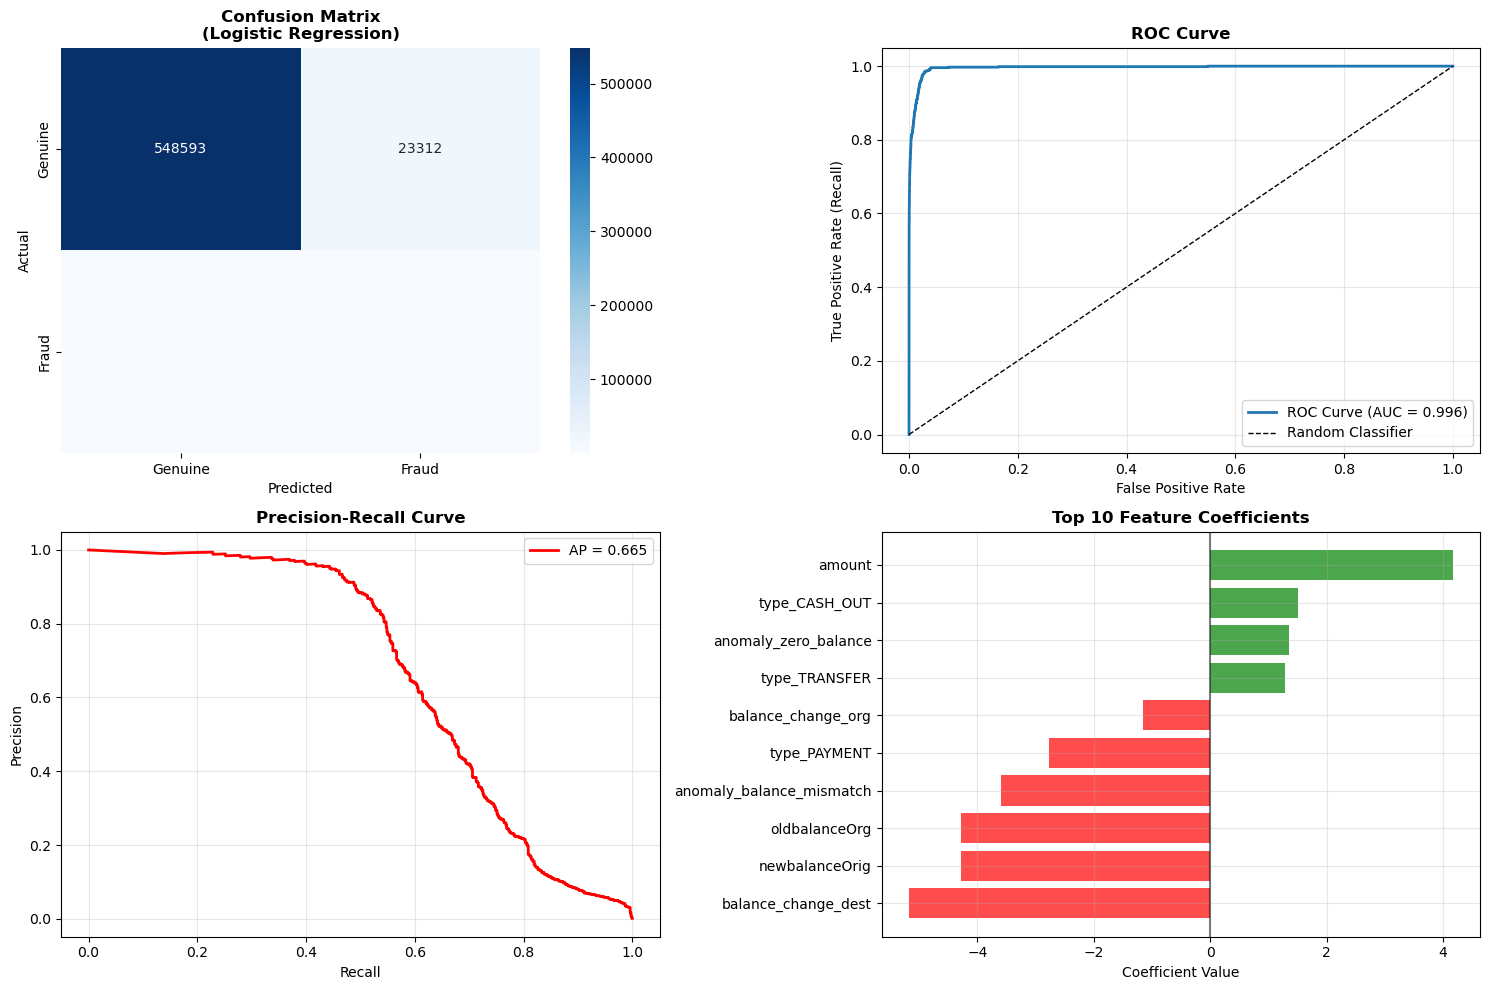


✅ LOGISTIC REGRESSION - COMPLETE TRAINING & EVALUATION SUMMARY

🎯 MODEL PERFORMANCE:
  • F1-Score:           0.0588
  • Precision:          0.0303
  • Recall:             0.9959
  • ROC AUC:            0.9957
  • Accuracy:           0.9593

💼 BUSINESS IMPACT:
  • Fraud Detection Rate:     99.59%
  • False Positive Rate:      4.08%
  • Net Financial Benefit:    $1,064,276,291.88

🔍 KEY INSIGHTS:
  • Most predictive of FRAUD:    balance_change_dest
  • Coefficient:                 -5.1754
  • Dataset size used:           1,908,786 transactions
  • Fraud cases in training:     1,704

🚀 MODEL STATUS: READY FOR DEPLOYMENT!


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

print("=== COMPLETE LOGISTIC REGRESSION - FROM DATA PREP TO EVALUATION ===")

# 1. LOAD THE DATASET
print("📊 STEP 1: LOADING DATASET...")
df = pd.read_csv("paysim dataset.csv")
print(f"Dataset loaded: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# 2. EXPLORE THE DATA
print("\n🔍 STEP 2: EXPLORING DATA...")
print(f"Target variable (isFraud) distribution:")
print(df['isFraud'].value_counts())
print(f"Fraud rate: {(df['isFraud'].mean() * 100):.4f}%")

print(f"\nTransaction types:")
print(df['type'].value_counts())

# 3. FEATURE ENGINEERING
print("\n🛠️ STEP 3: FEATURE ENGINEERING...")

# Create engineered features
def create_engineered_features(data):
    """Create engineered features for fraud detection"""
    df_eng = data.copy()
    
    # Basic feature engineering
    df_eng['balance_change_org'] = df_eng['newbalanceOrig'] - df_eng['oldbalanceOrg']
    df_eng['balance_change_dest'] = df_eng['newbalanceDest'] - df_eng['oldbalanceDest']
    df_eng['abs_balance_change_org'] = abs(df_eng['balance_change_org'])
    
    # Transaction type encoding
    type_dummies = pd.get_dummies(df_eng['type'], prefix='type')
    df_eng = pd.concat([df_eng, type_dummies], axis=1)
    
    # Anomaly flags
    df_eng['anomaly_zero_balance'] = ((df_eng['oldbalanceOrg'] == 0) & (df_eng['amount'] > 0)).astype(int)
    df_eng['expected_newbalance'] = df_eng['oldbalanceOrg'] - df_eng['amount']
    df_eng['anomaly_balance_mismatch'] = (abs(df_eng['newbalanceOrig'] - df_eng['expected_newbalance']) > 1).astype(int)
    
    return df_eng

# Apply feature engineering
df_engineered = create_engineered_features(df)
print(f"Engineered dataset shape: {df_engineered.shape}")

# 4. SELECT FEATURES FOR MODELING
print("\n🎯 STEP 4: SELECTING FEATURES FOR MODELING...")

feature_columns = [
    'amount', 
    'oldbalanceOrg', 
    'newbalanceOrig',
    'oldbalanceDest', 
    'newbalanceDest',
    'balance_change_org',
    'balance_change_dest',
    'abs_balance_change_org',
    'type_CASH_IN',
    'type_CASH_OUT', 
    'type_DEBIT',
    'type_PAYMENT',
    'type_TRANSFER',
    'anomaly_zero_balance',
    'anomaly_balance_mismatch'
]

X = df_engineered[feature_columns]
y = df_engineered['isFraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Fraud cases: {y.sum():,}")
print(f"Genuine cases: {(len(y) - y.sum()):,}")
print(f"Fraud rate: {(y.mean() * 100):.4f}%")

# 5. TRAIN-TEST SPLIT
print("\n📊 STEP 5: PERFORMING TRAIN-TEST SPLIT...")

# Sample the data for faster training (since dataset is large)
sample_fraction = 0.3
X_sample = X.sample(frac=sample_fraction, random_state=42)
y_sample = y.loc[X_sample.index]

print(f"Using sample size: {X_sample.shape[0]:,} transactions ({sample_fraction*100}% of total)")

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, 
    y_sample, 
    test_size=0.3,           # 30% for testing
    random_state=42,         # For reproducibility
    stratify=y_sample        # Maintain same fraud ratio in both sets
)

print("✅ Train-Test Split Completed!")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Training fraud rate: {(y_train.mean() * 100):.6f}%")
print(f"Test fraud rate: {(y_test.mean() * 100):.6f}%")

# 6. FEATURE SCALING
print("\n🔧 STEP 6: SCALING FEATURES FOR LOGISTIC REGRESSION...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Verify scaling worked
print(f"\n📊 Scaling verification:")
print(f"X_train_scaled - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"X_test_scaled - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")

# 7. TRAIN LOGISTIC REGRESSION MODEL
print("\n🤖 STEP 7: TRAINING LOGISTIC REGRESSION MODEL...")

# Compute class weights for handling imbalance
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_train), 
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class weights: Genuine={class_weights[0]:.2f}, Fraud={class_weights[1]:.2f}")

# Initialize and train the model
logreg_model = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    max_iter=1000,           # Ensure convergence
    C=0.1,                   # Regularization strength
    solver='liblinear',       # Good for smaller datasets
    penalty='l2'             # L2 regularization
)

logreg_model.fit(X_train_scaled, y_train)
print("✅ Logistic Regression model training completed!")

# 8. MAKE PREDICTIONS
print("\n🎯 STEP 8: MAKING PREDICTIONS...")

y_pred = logreg_model.predict(X_test_scaled)
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Probability of fraud

print("✅ Predictions completed!")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_pred_proba shape: {y_pred_proba.shape}")

# 9. COMPREHENSIVE MODEL EVALUATION
print("\n📊 STEP 9: COMPREHENSIVE MODEL EVALUATION")

# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

print("🎯 PERFORMANCE METRICS:")
print("=" * 60)
print(f"Accuracy:           {accuracy:.6f} ({accuracy*100:.4f}%)")
print(f"Precision:          {precision:.6f} ({precision*100:.4f}%)")
print(f"Recall:             {recall:.6f} ({recall*100:.4f}%)")
print(f"F1-Score:           {f1:.6f} ({f1*100:.4f}%)")
print(f"ROC AUC:            {roc_auc:.6f}")
print(f"Average Precision:  {avg_precision:.6f}")
print("=" * 60)

# 10. DETAILED CLASSIFICATION REPORT
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Genuine', 'Fraud']))

# 11. CONFUSION MATRIX
print("\n🔍 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"""
                Predicted
              Genuine    Fraud
Actual Genuine   {tn:>6}    {fp:>5}
Actual Fraud     {fn:>6}    {tp:>5}
""")

# Calculate rates
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)

print("📈 DETAILED RATES:")
print(f"True Positive Rate (Recall):    {true_positive_rate:.4f} ({true_positive_rate*100:.2f}%)")
print(f"True Negative Rate:             {true_negative_rate:.4f} ({true_negative_rate*100:.2f}%)")
print(f"False Positive Rate:            {false_positive_rate:.4f} ({false_positive_rate*100:.2f}%)")
print(f"False Negative Rate:            {false_negative_rate:.4f} ({false_negative_rate*100:.2f}%)")

# 12. BUSINESS IMPACT ANALYSIS
print("\n💼 BUSINESS IMPACT ANALYSIS:")

avg_fraud_amount = df_engineered[df_engineered['isFraud'] == 1]['amount'].mean()
total_fraud_in_test = y_test.sum()
detected_fraud = tp
missed_fraud = fn
false_alarms = fp

potential_savings = detected_fraud * avg_fraud_amount
missed_fraud_cost = missed_fraud * avg_fraud_amount
detection_rate = detected_fraud / total_fraud_in_test

print(f"💰 FINANCIAL ANALYSIS:")
print(f"  Average fraud amount:          ${avg_fraud_amount:,.2f}")
print(f"  Total fraud in test set:       {total_fraud_in_test:,}")
print(f"  Correctly detected fraud:      {detected_fraud:,}")
print(f"  Missed fraud cases:            {missed_fraud:,}")
print(f"  False alarms:                  {false_alarms:,}")
print(f"  Fraud detection rate:          {detection_rate:.2%}")
print(f"  Potential savings:             ${potential_savings:,.2f}")
print(f"  Potential losses (missed):     ${missed_fraud_cost:,.2f}")
print(f"  Net financial impact:          ${potential_savings - missed_fraud_cost:,.2f}")

# 13. FEATURE IMPORTANCE ANALYSIS
print("\n📈 FEATURE IMPORTANCE ANALYSIS:")

coefficients_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': logreg_model.coef_[0],
    'Abs_Coefficient': np.abs(logreg_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features:")
print(coefficients_df.head(10).round(4))

# 14. VISUALIZATION
print("\n📊 CREATING VISUALIZATIONS...")

plt.figure(figsize=(15, 10))

# Plot 1: Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Genuine', 'Fraud'], 
            yticklabels=['Genuine', 'Fraud'])
plt.title('Confusion Matrix\n(Logistic Regression)', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 2: ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Precision-Recall Curve
plt.subplot(2, 2, 3)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_curve, precision_curve, linewidth=2, color='red', label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Feature Coefficients
plt.subplot(2, 2, 4)
top_features = coefficients_df.head(10).sort_values('Coefficient', ascending=True)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.title('Top 10 Feature Coefficients', fontweight='bold')
plt.xlabel('Coefficient Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 15. FINAL SUMMARY
print("\n" + "="*70)
print("✅ LOGISTIC REGRESSION - COMPLETE TRAINING & EVALUATION SUMMARY")
print("="*70)

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"  • F1-Score:           {f1:.4f}")
print(f"  • Precision:          {precision:.4f}")
print(f"  • Recall:             {recall:.4f}")
print(f"  • ROC AUC:            {roc_auc:.4f}")
print(f"  • Accuracy:           {accuracy:.4f}")

print(f"\n💼 BUSINESS IMPACT:")
print(f"  • Fraud Detection Rate:     {detection_rate:.2%}")
print(f"  • False Positive Rate:      {false_positive_rate:.2%}")
print(f"  • Net Financial Benefit:    ${potential_savings - missed_fraud_cost:,.2f}")

print(f"\n🔍 KEY INSIGHTS:")
print(f"  • Most predictive of FRAUD:    {coefficients_df.iloc[0]['Feature']}")
print(f"  • Coefficient:                 {coefficients_df.iloc[0]['Coefficient']:.4f}")
print(f"  • Dataset size used:           {X_sample.shape[0]:,} transactions")
print(f"  • Fraud cases in training:     {y_train.sum():,}")

print(f"\n🚀 MODEL STATUS: READY FOR DEPLOYMENT!")
print("="*70)

In [4]:
import joblib
joblib.dump(logreg_model,"fraud_prediction.joblib")
print("Model saved")

Model saved
